Chapter 6
# 使用自定义色谱绘制热图
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [7]:
# 导入包

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")


In [2]:
# 生成满足标准正态分布随机数

data = np.random.randn(20, 20)

### 1. 连续色谱，均匀

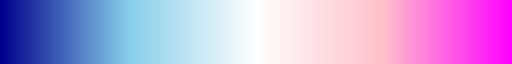

In [8]:
from matplotlib.colors import LinearSegmentedColormap
# matplotlib.colors.LinearSegmentedColormap() 可以用来产生连续色谱
# 函数输入为list；list 内可以是RGB/RGBA色号，也可以是色彩名称
# RGBA中的A是alpha (透明度)
# 参考
# https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html

continuous_cmap_even = LinearSegmentedColormap.from_list('', ['darkblue','skyblue','white','pink','magenta'])
# 采用默认均匀分布节点，线性插值点
continuous_cmap_even

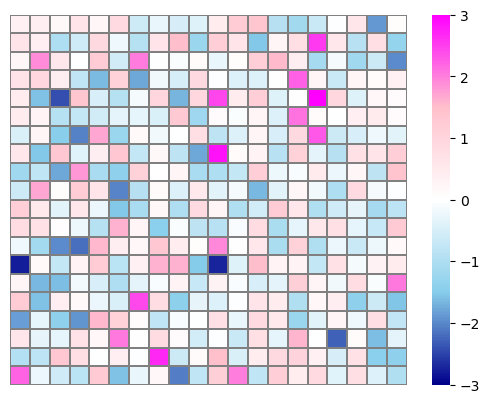

In [9]:
fig, ax = plt.subplots()
# 利用 seaborn.heatmap() 热图可视化随机数
HM = sns.heatmap(data, ax = ax,
                 vmin = -3,            # 色谱对应的最小值
                 vmax = 3,             # 色谱对应的最大值
                 cmap=continuous_cmap_even, # 使用自定义离散色谱
                 xticklabels=False,    # 删除横轴刻度标签
                 yticklabels=False,    # 删除纵轴刻度标签
                 linecolor = 'grey',   # 热图网格颜色
                 linewidths = 0.1)     # 热图网格线宽

# 在数轴上，vmin (-3) 和 vmax (3) 关于原点对称
# 这样可以保证，纯白色用来可视化 0

HM.tick_params(left=False, bottom=False)
# 删除横、纵轴刻度

fig.savefig('Figures/热图_连续色谱.svg', format='svg')

### 2. 连续色谱，不均匀

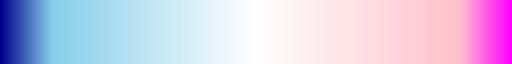

In [6]:
list_nodes  = [0.0, 0.1, 0.5, 0.9, 1.0] 
list_colors = ['darkblue','skyblue','white','pink','magenta']
# 定义颜色节点位置，数值在 [0, 1] 之间
# 每个值对应一个颜色
# 'darkblue' 位于 0.0
# 'skyblue'  位于 0.1
# 'white'    位于 0.5
# 'skyblue' 到 'white' 的线性过度占据色谱的 40% （0.5 - 0.1）
# 'pink'     位于 0.9
# 'white'  到 'pink'   的线性过度占据色谱的 40% （0.9 - 0.5）
# 'magenta'  位于 1.0


continuous_cmap_uneven = LinearSegmentedColormap.from_list("", list(zip(list_nodes, list_colors)))
continuous_cmap_uneven

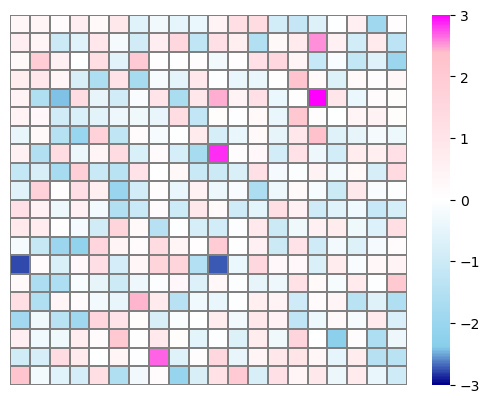

In [5]:
# 采用默认线性插值点
# 较深颜色位于色谱的两端尾部 (0.0 ~ 0.1, 0.9 ~ 1.0)
# 使用这个色谱，更容易发现离群值

fig, ax = plt.subplots()
# 利用 seaborn.heatmap() 热图可视化随机数
HM = sns.heatmap(data, ax = ax,
                 vmin = -3,            # 色谱对应的最小值
                 vmax = 3,             # 色谱对应的最大值
                 cmap=continuous_cmap_uneven, # 使用自定义离散色谱
                 xticklabels=False,    # 删除横轴刻度标签
                 yticklabels=False,    # 删除纵轴刻度标签
                 linecolor = 'grey',   # 热图网格颜色
                 linewidths = 0.1)     # 热图网格线宽

HM.tick_params(left=False, bottom=False)
# 删除横、纵轴刻度

fig.savefig('Figures/热图_连续色谱_不均匀.svg', format='svg')

### 3. 离散色谱

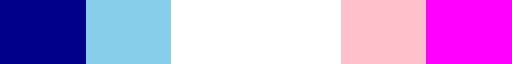

In [10]:
from matplotlib.colors import ListedColormap
# matplotlib.colors.ListedColormap() 可以用来产生离散色谱
# 函数输入为list；list 内可以是RGB/RGBA色号，也可以是色彩名称
# RGBA中的A是alpha (透明度)
# 参考
# https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html

import seaborn as sns
discrete_cmap = ListedColormap(['darkblue','skyblue','white','white', 'pink','magenta'])
# 两个白色
discrete_cmap

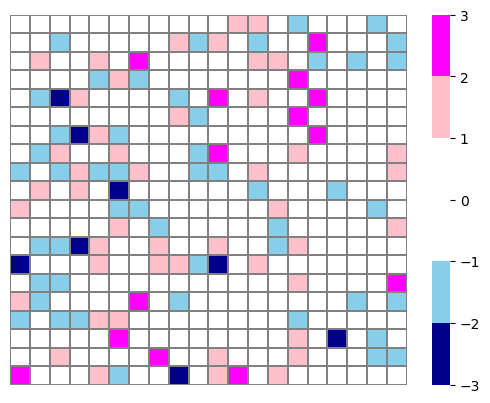

In [11]:
fig, ax = plt.subplots()
# 利用 seaborn.heatmap() 热图可视化随机数
HM = sns.heatmap(data, ax = ax,
                 vmin = -3,          # 色谱对应的最小值
                 vmax = 3,           # 色谱对应的最大值                 
                 cmap=discrete_cmap, # 使用自定义离散色谱
                 xticklabels=False,  # 删除横轴刻度标签
                 yticklabels=False,  # 删除纵轴刻度标签
                 linecolor = 'grey', # 热图网格颜色
                 linewidths = 0.1)   # 热图网格线宽

HM.tick_params(left=False, bottom=False)
# 删除横、纵轴刻度

fig.savefig('Figures/热图_离散色谱.svg', format='svg')
# [2, 3] 用品红
# [1, 2] 用粉色
# [-1, 1] 用白色
# [-2, -1] 用天蓝
# [-3, -2] 用深蓝

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023